In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft
import scipy.signal as signal
from math import log10
from scipy.signal import butter, lfilter
from scipy.stats import linregress
from statistics import mean


In [2]:
pip install biosignalsnotebooks

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.1/39.1 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.8 MB/s eta 0:00:00
  Created wheel for libmagic: filename=libmagic-1.0-py3-none-any.whl size=4269 sha256=86f6d8c6d1ab0e1deded6f8930e7ea87d1e01be9ff76c3f6de1461e7c2848671
  Stored in directory: /root/.cache/pip/wheels/31/ce/d8/099fbd4dbfa5da5596a39eee8a17d2e1bcc29006c07d3563b7
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=a3543269fb9901b529bae5beef8b0d7c78ca51dde2203d7d63c6a3aca1af3450
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built libmagic wget


In [3]:
import biosignalsnotebooks as bsnb

Text(0.5, 1.0, 'Pronacion P2')

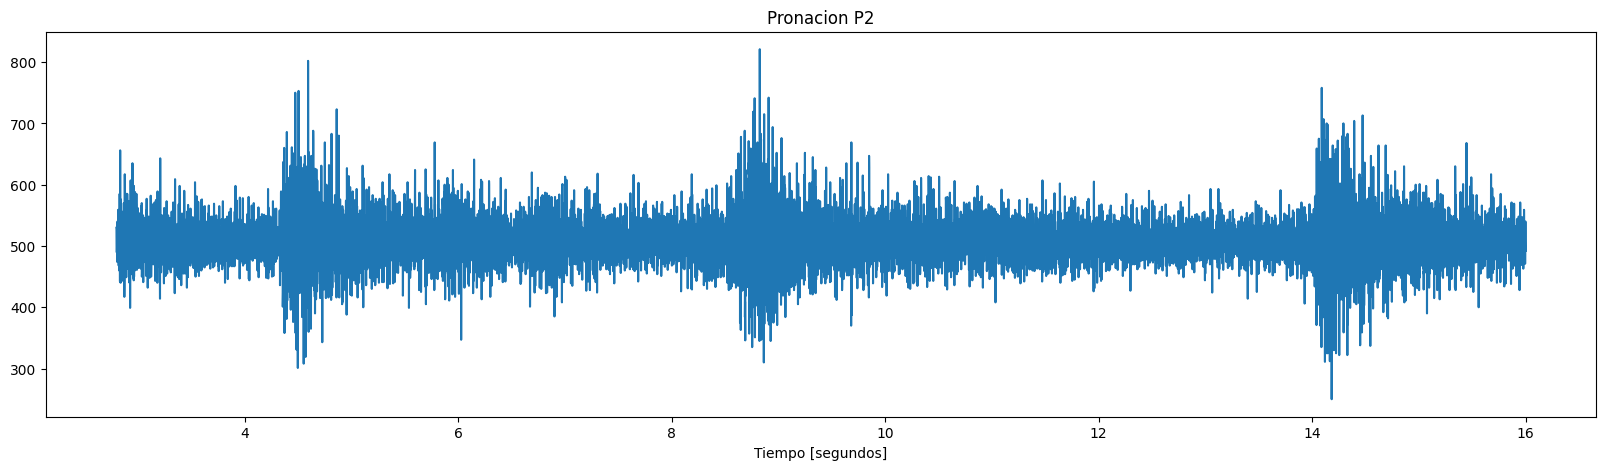

In [4]:
array1 = np.genfromtxt("p2_pronacion2.txt",   skip_header=1, delimiter="\t")
Fs = 1000
Ts = 1/Fs
señal = array1[:,-2]
señalP = señal[2800:16000]
n = len(señalP)
t = np.arange(2800,2800+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.xlabel("Tiempo [segundos]")
plt.title("Pronacion P2")



## Adapatación de la señal

[-0.06707213  0.06068431  0.04790867 ...  0.08942951 -0.05429649
 -0.06387822]


Text(0.5, 1.0, 'Señal EMG Pronación')

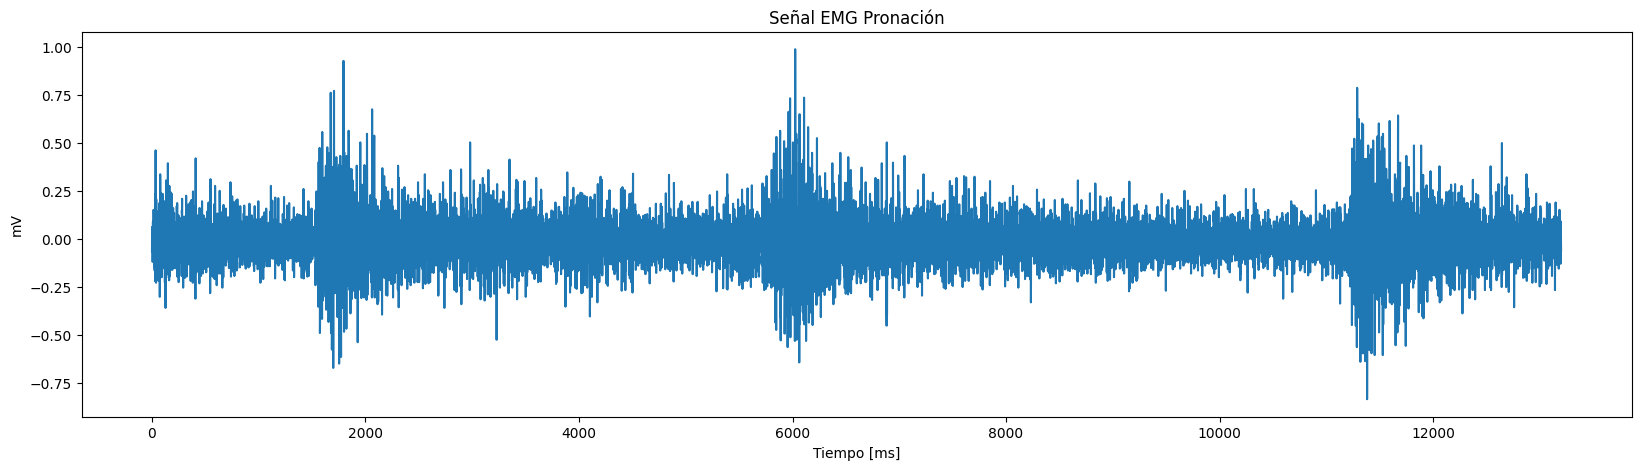

In [5]:
vcc  = 3300 #mV
gain = 1009
resolution = 10
señal = array1[:,-2]
nseñal = (((señal / 2**resolution) - 0.5) * vcc) / gain
nseñal = nseñal[2800:16000]
print(nseñal)
plt.figure(figsize=(20,5))
plt.plot(nseñal)
plt.ylabel("mV")
plt.xlabel("Tiempo [ms]")
plt.title("Señal EMG Pronación")

## DETECCIÓN DE EVENTOS

Text(0.5, 1.0, 'Flexion P2')

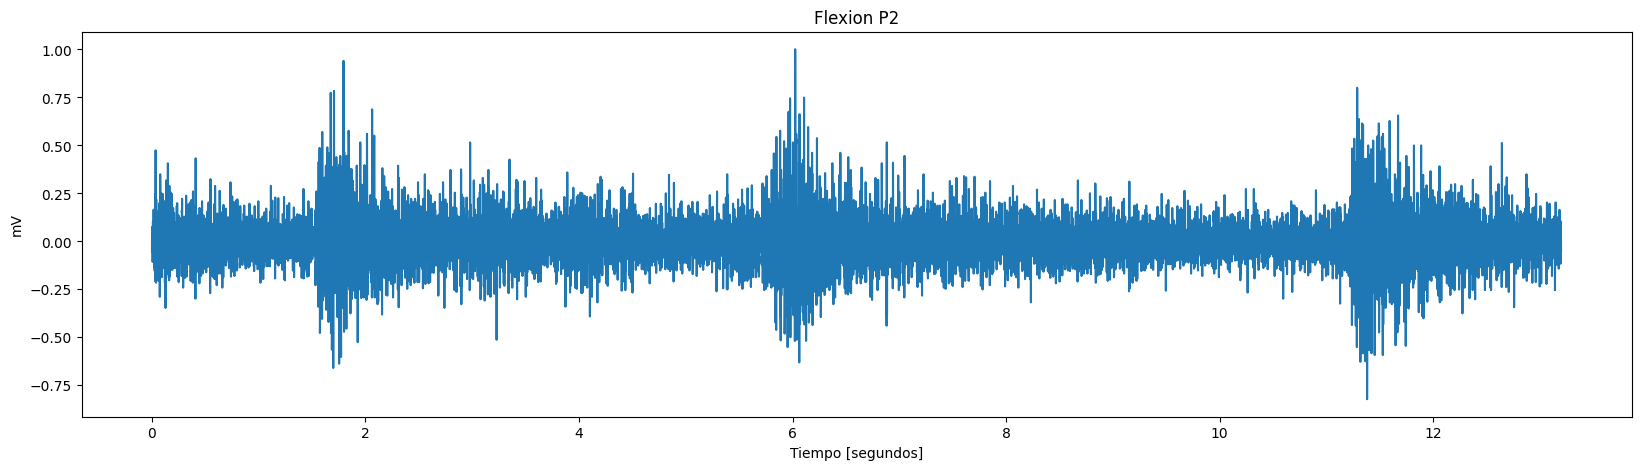

In [6]:
# Eliminacion de la linea de Base

#average = sum(señalP)/len(señalP)
#pre_pro_signal = señalP - average
pre_pro_signal2 = nseñal - np.average(nseñal)
pre_pro_signal2

señalP = pre_pro_signal2
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Flexion P2")

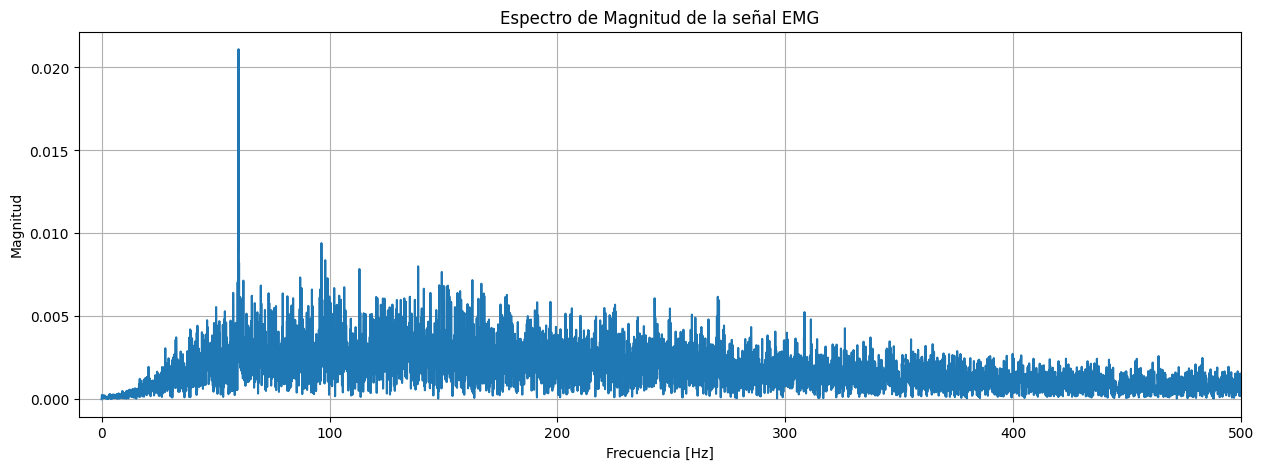

In [7]:
# Analizar el Fourier
emg_senal = pre_pro_signal2
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG")
plt.xlim(-10,500)
plt.show()

Text(0.5, 1.0, 'Señal EMG filtrada mediante Filtro Notch')

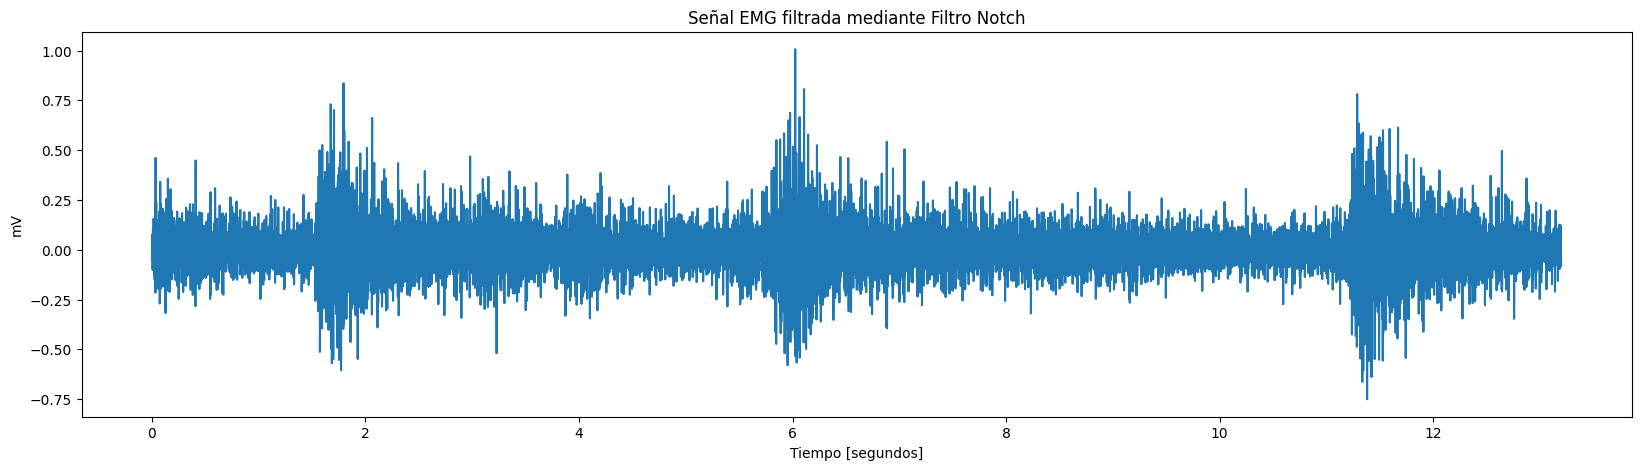

In [8]:
from scipy.signal import iirnotch, lfilter
f0 = 60.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, emg_senal)
#y = lfilter(b, a, y)

f0 = 90.0  # Frecuencia que queremos filtrar (Hz)
Q = 20.0  # Factor de Calidad
# Diseño de filtro notch
b, a = iirnotch(f0, Q, Fs)
y = lfilter(b, a, y)

señalP = y
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG filtrada mediante Filtro Notch")


In [ ]:
emg_senal = y
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG filtrada")
plt.xlim(-10,500)
plt.show()

In [ ]:
# Filtrado

low_cutoff = 40
high_cutoff = 300

pre_pro_signal = bsnb.aux_functions._butter_bandpass_filter(y, low_cutoff, high_cutoff, Fs)

señalP = pre_pro_signal
n = len(señalP)
t = np.arange(0,0+n,1)*Ts
plt.figure(figsize=(20,5))
plt.plot(t, señalP)
plt.ylabel("mV")
plt.xlabel("Tiempo [segundos]")
plt.title("Señal EMG Filtrada mediante Filtro Pasabanda")

In [ ]:
# Código empleado para generar los archivos numpy de las señales ya filtradas
señalT = señalP
data = {'señalT': señalT}
np.savez('pronacion2.npz',**data)

In [ ]:
# Analizar el Fourier
emg_senal = pre_pro_signal
Fs = 1000
Ts = 1/Fs
N = len(emg_senal)
yf = fft(emg_senal)
xf = np.linspace(0.0, 1.0/(2.0*Ts), N//2)
plt.figure(figsize=(15,5))
ejy = 2.0/N * np.abs(yf[0:N//2])
plt.plot(xf, ejy )
plt.grid()
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("Espectro de Magnitud de la señal EMG filtrada")
plt.xlim(-10,500)
plt.show()

In [ ]:
from statistics import stdev
# Umbral
avg_pre_pro_signal = mean(pre_pro_signal)
std_pre_pro_signal = stdev(pre_pro_signal)

In [ ]:
# Deteccion de Activación
burst_begin, burst_end = bsnb.detect_emg_activations(señalP, Fs, smooth_level = 60, threshold_level = 40, time_units = True, plot_result = True)[:2]

## EXTRACCION DE CARACTERISTICAS


In [ ]:
# Maximo
max_sample_value = max(señalP)
max_sample_value

In [ ]:
# Minimo
min_sample_value = min(señalP)
min_sample_value

In [ ]:
# Promedio

avg_sample_value = np.average(señalP)
avg_sample_value


In [ ]:
# Desviacion estandar

std_sample_value = np.std(señalP)
std_sample_value

In [ ]:
time_param_dict = {"Maximum EMG": max_sample_value, "Minimum EMG": min_sample_value, "Average EMG": avg_sample_value, "Standard Deviation EMG": std_sample_value}
time_param_dict

In [ ]:
# Root Mean Square
from statistics import sqrt

rms = sqrt((sum(señalP*señalP))/len(señalP))
rms

In [ ]:
# Area bajo la curva
from scipy import integrate
area = integrate.cumtrapz(señalP)
area

In [ ]:
# Potencia espectral de la señal
from scipy import signal
f, P = signal.welch(señalP, fs = Fs, window = 'hann', noverlap = 0, nfft = int(500.))
plt.figure(figsize=(20,5))
plt.plot(f, P)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.title("EMG Power Spectral Density")
plt.show()

In [ ]:
# potencia total
area_freq = integrate.cumtrapz(P, f, initial = 0)
total_power = area_freq[-1]
total_power

In [ ]:
# Frecuencia Media

median_freq = f[np.where(area_freq >= total_power / 2)[0][0]]
median_freq

In [ ]:
f_max = f[np.argmax(P)]
f_max